# FEATURE ANALYTICS

# ROUND 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_DA.csv")

In [3]:
damage_labels = [1, 2, 3]

In [4]:
#Minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [5]:
print(min_count)

25124


In [86]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [87]:
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,floors,age_range,damage_grade
133403,538547,11,883,8617,2,15,12,6,t,u,...,0,0,0,0,0,0,0,2,B,1
19941,79454,26,39,11440,1,0,9,3,t,u,...,0,0,0,0,0,0,0,1,A,1
180364,727945,26,919,9760,1,10,6,4,t,w,...,0,0,0,0,0,0,0,1,A,1
127884,515837,13,1154,432,1,0,5,3,n,r,...,0,0,0,0,0,0,0,1,A,1
118616,478332,26,1259,1919,2,15,6,7,t,r,...,0,0,0,0,0,0,0,2,B,1


## Count Floors

In [131]:
query = "SELECT floors, damage_grade FROM train_data"

In [132]:
result = sqldf(query)

In [133]:
print(result)

       floors  damage_grade
0           2             1
1           1             1
2           1             1
3           1             1
4           2             1
...       ...           ...
75367       2             3
75368       2             3
75369       2             3
75370       2             3
75371       1             3

[75372 rows x 2 columns]


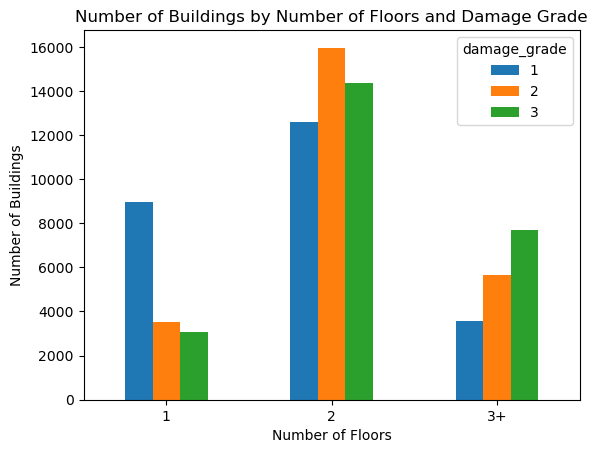

In [136]:
    # Group the result by damage grade and count the number of buildings for each floor count value
plot_data = result.groupby('floors')['damage_grade'].value_counts().unstack()

plot_data.plot(kind='bar')

plt.xlabel('Number of Floors')
plt.ylabel('Number of Buildings')
plt.title('Number of Buildings by Number of Floors and Damage Grade')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)

plt.show()

## Age

In [12]:
query = "SELECT age, damage_grade FROM train_data WHERE age < 70"
result = sqldf(query)
print(result)

       age  damage_grade
0        0             1
1        0             1
2       25             1
3       15             1
4        0             1
...    ...           ...
72704   20             3
72705   10             3
72706   45             3
72707   10             3
72708   50             3

[72709 rows x 2 columns]


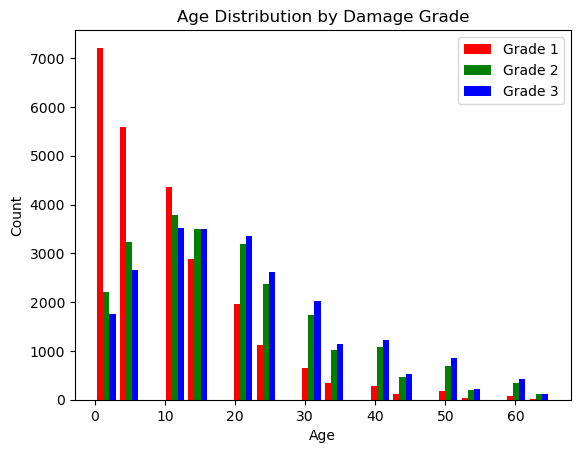

In [13]:
# Histogram of age counts for each damage level
plt.hist([result[result['damage_grade'] == i]['age'] for i in range(1, 4)], 
         bins = 20, 
         color = ['r', 'g', 'b'], 
         label = ['Grade 1', 'Grade 2', 'Grade 3'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Damage Grade')

plt.legend()

plt.show()

## Area Percentage

In [14]:
query = "SELECT area_percentage, damage_grade FROM train_data"
result = sqldf(query)
print(result)

       area_percentage  damage_grade
0                    8             1
1                    7             1
2                   16             1
3                    3             1
4                   16             1
...                ...           ...
75367                6             3
75368                5             3
75369                5             3
75370                5             3
75371                8             3

[75372 rows x 2 columns]


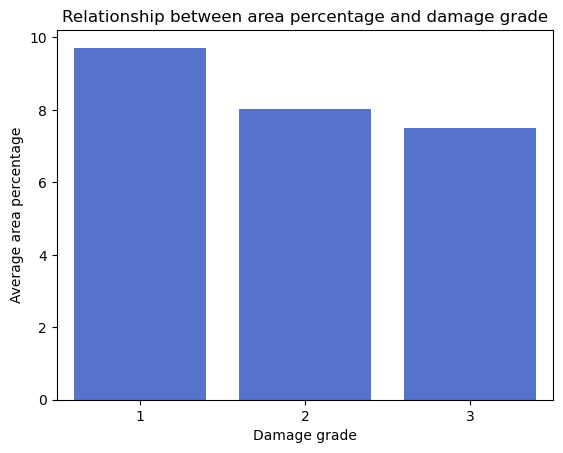

In [15]:
#Average area percentage for each damage grade category
avg_area_percentage = train_data.groupby('damage_grade')['area_percentage'].mean().reset_index()

sns.barplot(x='damage_grade', y='area_percentage', data=avg_area_percentage, color='royalblue')

plt.xlabel('Damage grade')
plt.ylabel('Average area percentage')
plt.title('Relationship between area percentage and damage grade')

plt.show()

## Height Percentage

In [16]:
 query = "SELECT height_percentage, damage_grade FROM train_data"
result = sqldf(query)
print(result)

       height_percentage  damage_grade
0                      3             1
1                      3             1
2                     10             1
3                      4             1
4                      3             1
...                  ...           ...
75367                  7             3
75368                  7             3
75369                  7             3
75370                  7             3
75371                  6             3

[75372 rows x 2 columns]


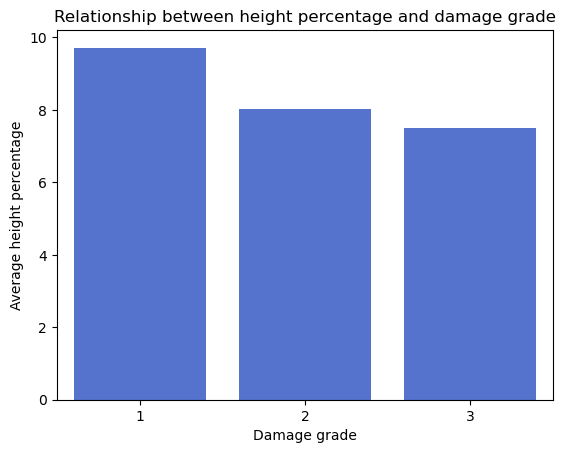

In [17]:
# Average area percentage for each damage grade category
avg_height_percentage = train_data.groupby('damage_grade')['height_percentage'].mean().reset_index()

sns.barplot(x='damage_grade', y='area_percentage', data=avg_area_percentage, color='royalblue')

plt.xlabel('Damage grade')
plt.ylabel('Average height percentage')
plt.title('Relationship between height percentage and damage grade')

plt.show()

## SUPERSTRUCTURES

## Adobe Mud

In [62]:
query = "SELECT has_superstructure_adobe_mud, damage_grade FROM train_data WHERE has_superstructure_adobe_mud = 1"
result = sqldf(query)
print(result)

      has_superstructure_adobe_mud  damage_grade
0                                1             1
1                                1             1
2                                1             1
3                                1             1
4                                1             1
...                            ...           ...
5287                             1             3
5288                             1             3
5289                             1             3
5290                             1             3
5291                             1             3

[5292 rows x 2 columns]


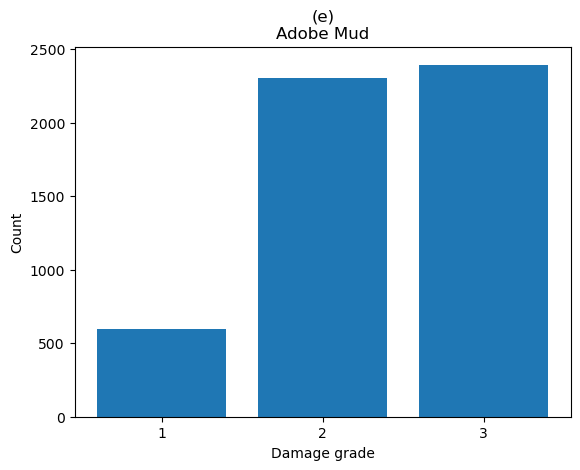

In [63]:
#Counting the occurrences of each category
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for Adobe Mud Superstructures')
ax.set_title('(e)\nAdobe Mud')
ax.set_xticks(range(1, 4))

plt.show()


## Mud Mortar Stone

In [64]:
query = "SELECT has_superstructure_mud_mortar_stone, damage_grade FROM train_data WHERE has_superstructure_mud_mortar_stone = 1"
result = sqldf(query)
print(result)

       has_superstructure_mud_mortar_stone  damage_grade
0                                        1             1
1                                        1             1
2                                        1             1
3                                        1             1
4                                        1             1
...                                    ...           ...
49898                                    1             3
49899                                    1             3
49900                                    1             3
49901                                    1             3
49902                                    1             3

[49903 rows x 2 columns]


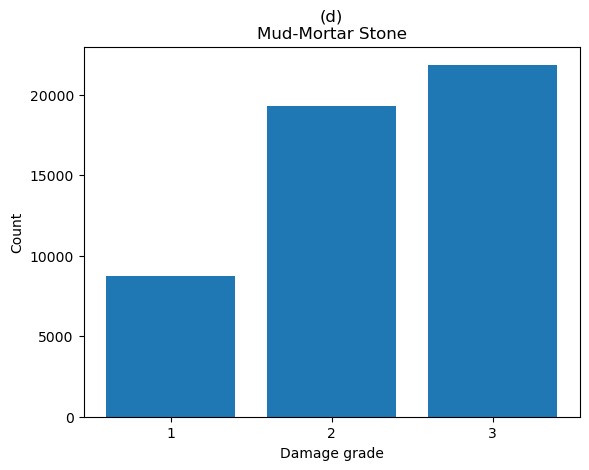

In [65]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for Mud Mortar Stone Superstructures')
ax.set_title('(d)\nMud-Mortar Stone')
ax.set_xticks(range(1, 4))

plt.show()

## Stone Flag

In [66]:
query = "SELECT has_superstructure_stone_flag , damage_grade FROM train_data WHERE has_superstructure_stone_flag = 1"
result = sqldf(query)
print(result)

      has_superstructure_stone_flag  damage_grade
0                                 1             1
1                                 1             1
2                                 1             1
3                                 1             1
4                                 1             1
...                             ...           ...
2111                              1             3
2112                              1             3
2113                              1             3
2114                              1             3
2115                              1             3

[2116 rows x 2 columns]


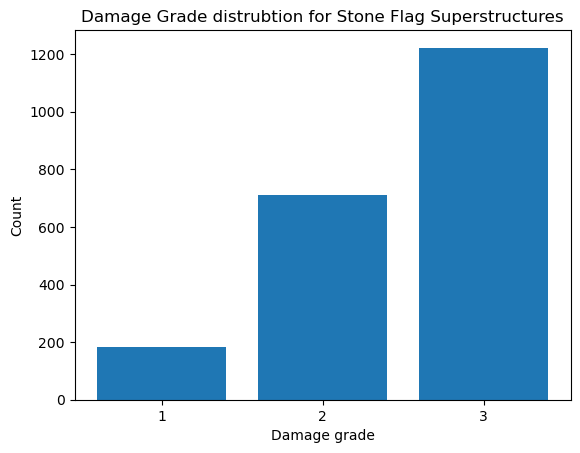

In [67]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
ax.set_title('Damage Grade distrubtion for Stone Flag Superstructures')
ax.set_xticks(range(1, 4))
plt.show()

## Cement Mortar Stone

In [68]:
query = "SELECT has_superstructure_cement_mortar_stone , damage_grade FROM train_data WHERE has_superstructure_cement_mortar_stone = 1"
result = sqldf(query)
print(result)

      has_superstructure_cement_mortar_stone  damage_grade
0                                          1             1
1                                          1             1
2                                          1             1
3                                          1             1
4                                          1             1
...                                      ...           ...
1582                                       1             3
1583                                       1             3
1584                                       1             3
1585                                       1             3
1586                                       1             3

[1587 rows x 2 columns]


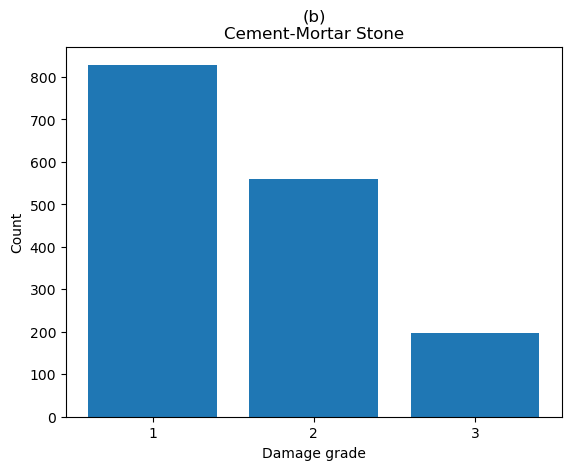

In [69]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distribution for Cement Mortar Stone Superstructures')
ax.set_title('(b)\nCement-Mortar Stone')
ax.set_xticks(range(1, 4))

plt.show()

## Mud Mortar Brick

In [70]:
query = "SELECT has_superstructure_mud_mortar_brick , damage_grade FROM train_data WHERE has_superstructure_mud_mortar_brick = 1"
result = sqldf(query)
print(result)

      has_superstructure_mud_mortar_brick  damage_grade
0                                       1             1
1                                       1             1
2                                       1             1
3                                       1             1
4                                       1             1
...                                   ...           ...
4230                                    1             3
4231                                    1             3
4232                                    1             3
4233                                    1             3
4234                                    1             3

[4235 rows x 2 columns]


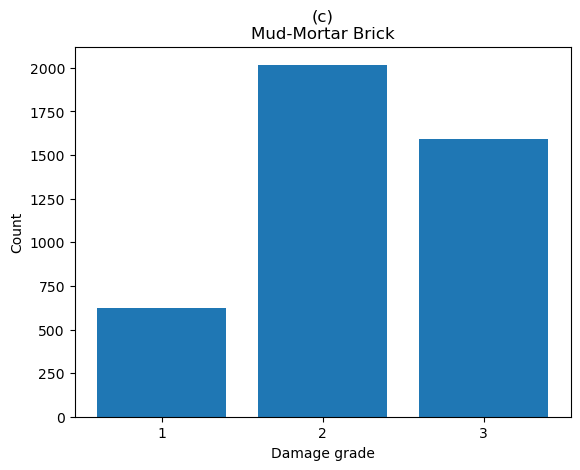

In [71]:
counts = result['damage_grade'].value_counts()


fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for Mud Mortar Brick Superstructures')
ax.set_title('(c)\nMud-Mortar Brick')
ax.set_xticks(range(1, 4))
plt.show()

## Cement Mortar Brick

In [72]:
query = "SELECT has_superstructure_cement_mortar_brick , damage_grade FROM train_data WHERE has_superstructure_cement_mortar_brick = 1"
result = sqldf(query)
print(result)

      has_superstructure_cement_mortar_brick  damage_grade
0                                          1             1
1                                          1             1
2                                          1             1
3                                          1             1
4                                          1             1
...                                      ...           ...
9379                                       1             3
9380                                       1             3
9381                                       1             3
9382                                       1             3
9383                                       1             3

[9384 rows x 2 columns]


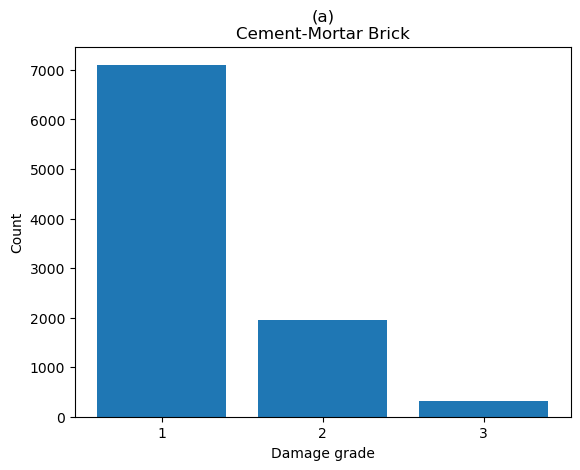

In [73]:
counts = result['damage_grade'].value_counts()


fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for Cement Mortar Brick Superstructures')
ax.set_title('(a)\nCement-Mortar Brick')
ax.set_xticks(range(1, 4))
plt.show()

## Timber

In [88]:
query = "SELECT has_superstructure_timber , damage_grade FROM train_data WHERE has_superstructure_timber = 1"
result = sqldf(query)
print(result)

       has_superstructure_timber  damage_grade
0                              1             1
1                              1             1
2                              1             1
3                              1             1
4                              1             1
...                          ...           ...
19812                          1             3
19813                          1             3
19814                          1             3
19815                          1             3
19816                          1             3

[19817 rows x 2 columns]


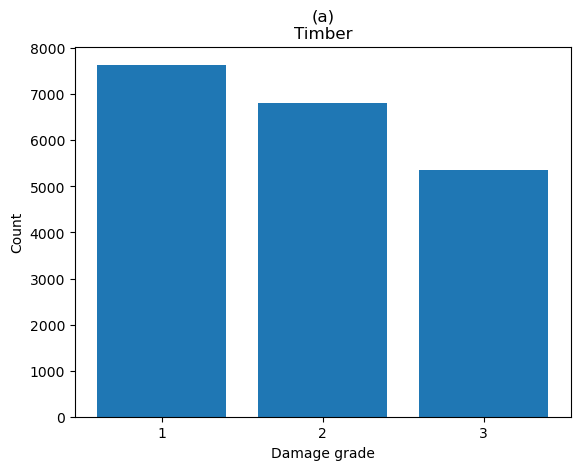

In [89]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for Timber Superstructures')
ax.set_title('(a)\nTimber')
ax.set_xticks(range(1, 4))
plt.show()

## Bamboo

In [90]:
query = "SELECT has_superstructure_bamboo , damage_grade FROM train_data WHERE has_superstructure_bamboo = 1"
result = sqldf(query)
print(result)

      has_superstructure_bamboo  damage_grade
0                             1             1
1                             1             1
2                             1             1
3                             1             1
4                             1             1
...                         ...           ...
6777                          1             3
6778                          1             3
6779                          1             3
6780                          1             3
6781                          1             3

[6782 rows x 2 columns]


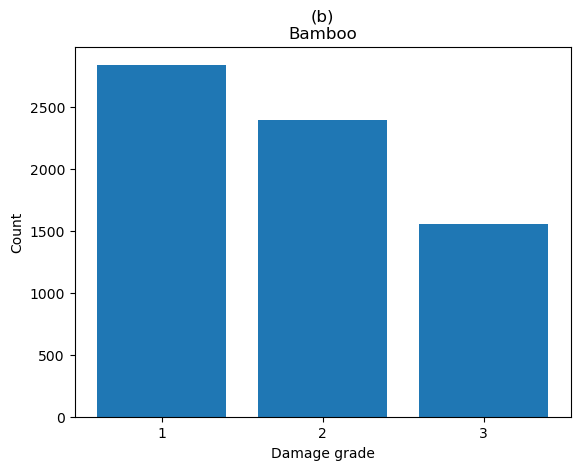

In [91]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
ax.set_title('Damage Grade distrubtion for Bamboo Superstructures')
ax.set_title('(b)\nBamboo')
ax.set_xticks(range(1, 4))
plt.show()

## RC Non-Engineered

In [78]:
query = "SELECT has_superstructure_rc_non_engineered , damage_grade FROM train_data WHERE has_superstructure_rc_non_engineered = 1 "
result = sqldf(query)
print(result)

      has_superstructure_rc_non_engineered  damage_grade
0                                        1             1
1                                        1             1
2                                        1             1
3                                        1             1
4                                        1             1
...                                    ...           ...
5280                                     1             3
5281                                     1             3
5282                                     1             3
5283                                     1             3
5284                                     1             3

[5285 rows x 2 columns]


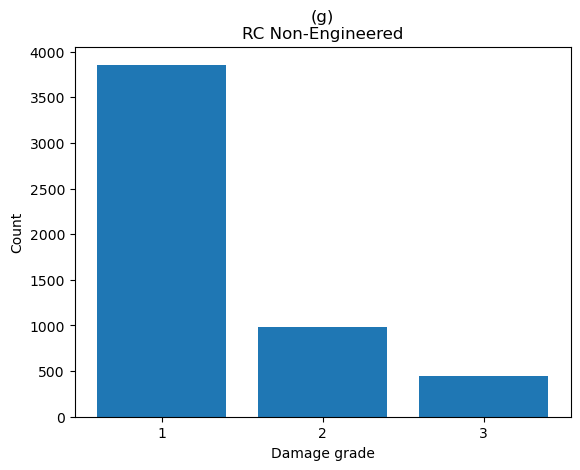

In [79]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for RC Non-Engineered Superstructures')
ax.set_title('(g)\nRC Non-Engineered')
ax.set_xticks(range(1, 4))
plt.show()

## RC Engineered

In [80]:
query = "SELECT has_superstructure_rc_engineered , damage_grade FROM train_data WHERE has_superstructure_rc_engineered = 1"
result = sqldf(query)
print(result)

      has_superstructure_rc_engineered  damage_grade
0                                    1             1
1                                    1             1
2                                    1             1
3                                    1             1
4                                    1             1
...                                ...           ...
2906                                 1             3
2907                                 1             3
2908                                 1             3
2909                                 1             3
2910                                 1             3

[2911 rows x 2 columns]


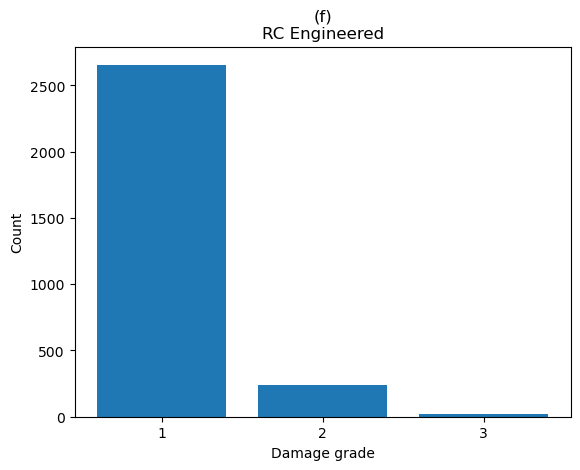

In [81]:
counts = result['damage_grade'].value_counts()

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Damage grade')
ax.set_ylabel('Count')
# ax.set_title('Damage Grade distrubtion for RC Engineered Superstructures')
ax.set_title('(f)\nRC Engineered')

ax.set_xticks(range(1, 4))
plt.show()

# ROUND 2

## Considering earthquake resistant superstructures with floor count

 ### Cement Mortar Stone

In [121]:
query = "SELECT has_superstructure_cement_mortar_stone, floors, damage_grade FROM train_data WHERE has_superstructure_cement_mortar_stone = 1"
result = sqldf(query)
print(result)

      has_superstructure_cement_mortar_stone  floors  damage_grade
0                                          1       3             1
1                                          1       1             1
2                                          1       3             1
3                                          1       1             1
4                                          1       2             1
...                                      ...     ...           ...
1582                                       1       3             3
1583                                       1       3             3
1584                                       1       2             3
1585                                       1       2             3
1586                                       1       1             3

[1587 rows x 3 columns]


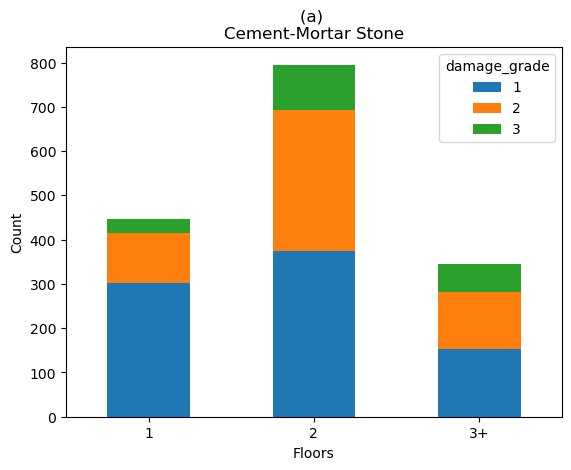

In [122]:
# Grouping by floors and damage grade
grouped = result.groupby(['floors', 'damage_grade']).size().unstack(fill_value=0)

# Stacked bar chart for each floor count
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Floors')
plt.ylabel('Count')
# plt.title('Cement Mortar Stone Damage Grade Distribution by Floors')
plt.title('(a) \nCement-Mortar Stone')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)
plt.show()

### Mud Mortar Brick

In [123]:
query = "SELECT has_superstructure_mud_mortar_brick,floors, damage_grade FROM train_data WHERE has_superstructure_mud_mortar_brick = 1"
result = sqldf(query)
print(result)

      has_superstructure_mud_mortar_brick  floors  damage_grade
0                                       1       3             1
1                                       1       1             1
2                                       1       1             1
3                                       1       2             1
4                                       1       2             1
...                                   ...     ...           ...
4230                                    1       2             3
4231                                    1       3             3
4232                                    1       2             3
4233                                    1       2             3
4234                                    1       3             3

[4235 rows x 3 columns]


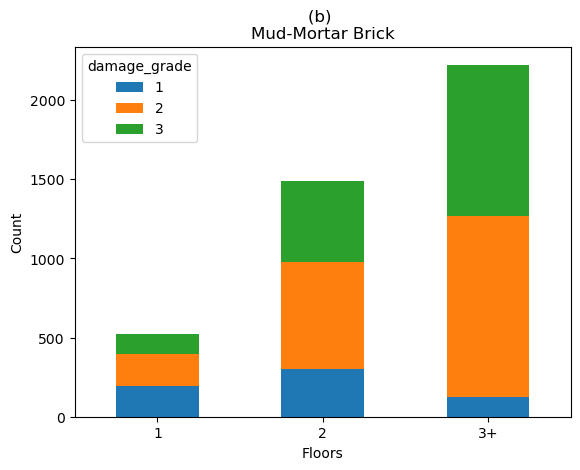

In [124]:
grouped = result.groupby(['floors', 'damage_grade']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Floors')
plt.ylabel('Count')
# plt.title('Mud Mortar Brick Damage Grade Distribution by Floors')
plt.title('(b) \nMud-Mortar Brick')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)
plt.show()

### Cement Mortar Brick

In [125]:
query = "SELECT has_superstructure_cement_mortar_brick, floors, damage_grade FROM train_data WHERE has_superstructure_cement_mortar_brick = 1"
result = sqldf(query)
print(result)

      has_superstructure_cement_mortar_brick  floors  damage_grade
0                                          1       2             1
1                                          1       1             1
2                                          1       1             1
3                                          1       2             1
4                                          1       3             1
...                                      ...     ...           ...
9379                                       1       3             3
9380                                       1       2             3
9381                                       1       2             3
9382                                       1       2             3
9383                                       1       3             3

[9384 rows x 3 columns]


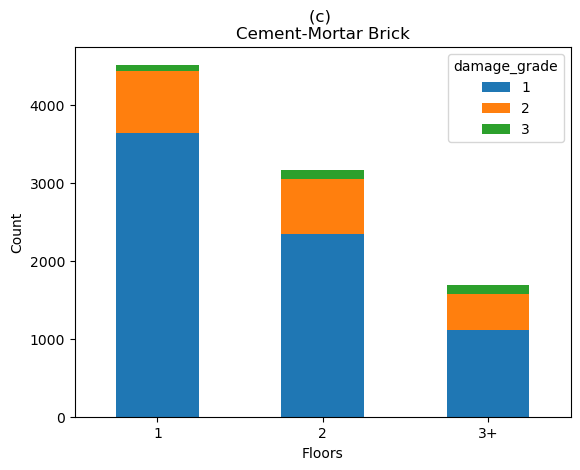

In [126]:
grouped = result.groupby(['floors', 'damage_grade']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Floors')
plt.ylabel('Count')
# plt.title('Cement Mortar Brick Damage Grade Distribution by Floors')
plt.title('(c) \nCement-Mortar Brick')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)
plt.show()

### RC Non Engineered

In [139]:
query = "SELECT has_superstructure_rc_non_engineered, floors, damage_grade FROM train_data WHERE has_superstructure_rc_non_engineered = 1 "
result = sqldf(query)
print(result)

      has_superstructure_rc_non_engineered  floors  damage_grade
0                                        1       2             1
1                                        1       3             1
2                                        1       1             1
3                                        1       2             1
4                                        1       1             1
...                                    ...     ...           ...
5280                                     1       2             3
5281                                     1       3             3
5282                                     1       1             3
5283                                     1       2             3
5284                                     1       2             3

[5285 rows x 3 columns]


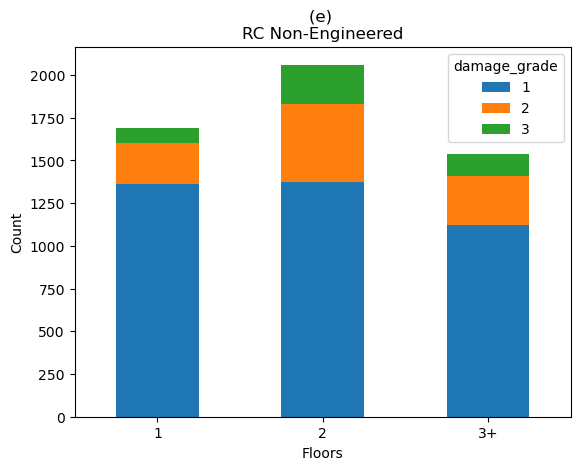

In [140]:
grouped = result.groupby(['floors', 'damage_grade']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Floors')
plt.ylabel('Count')
# plt.title('RC Non-Engineered Damage Grade Distribution by Floors')
plt.title('(e) \nRC Non-Engineered')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)
plt.show()

### RC Engineered

In [141]:
query = "SELECT has_superstructure_rc_engineered, floors, damage_grade FROM train_data WHERE has_superstructure_rc_engineered = 1"
result = sqldf(query)
print(result)

      has_superstructure_rc_engineered  floors  damage_grade
0                                    1       2             1
1                                    1       1             1
2                                    1       3             1
3                                    1       3             1
4                                    1       2             1
...                                ...     ...           ...
2906                                 1       3             3
2907                                 1       1             3
2908                                 1       3             3
2909                                 1       3             3
2910                                 1       3             3

[2911 rows x 3 columns]


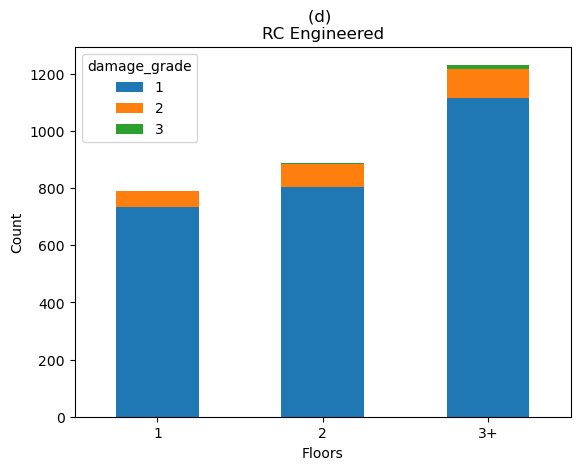

In [142]:
grouped = result.groupby(['floors', 'damage_grade']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Floors')
plt.ylabel('Count')
# plt.title('RC Engineered Damage Grade Distribution by Floors')
plt.title('(d) \nRC Engineered')
plt.xticks([0,1,2], ['1','2','3+'], rotation=0)
plt.show()